In [44]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Missing values and imputing then**

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# finding percentage of missing values
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
# 1- droping the column haveing 70% missing valuesfrom  dataset
df.drop('deck', axis=1, inplace=True)

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [7]:
df['age'].mean()

np.float64(29.69911764705882)

In [8]:
df['age'].median()

28.0

In [9]:
df['age'].mode()

0    24.0
Name: age, dtype: float64

In [10]:
# 2- Filling missing values of age column by the mean of age
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [12]:
df['embarked'].mode()[0]

'S'

In [13]:
df['embark_town'].mode()[0]

'Southampton'

In [14]:
# filling embarked and embarked_twon with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

<Axes: >

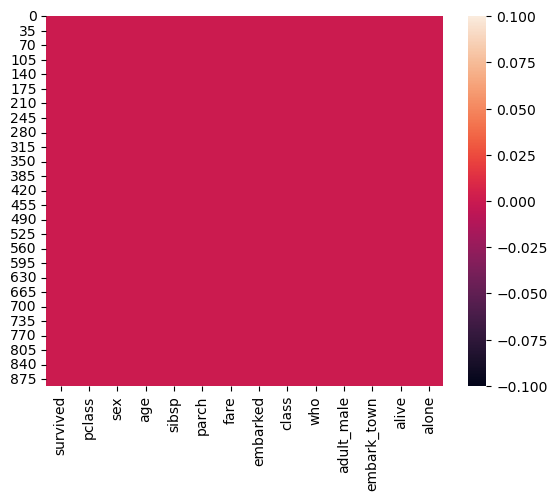

In [15]:
# ploting heat map for missing values
sns.heatmap(df.isnull())

# **Binning**
A process of grouping continuous numerical values into a smaller number of discrete intervals or bins

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [17]:
df.age.min()

0.42

In [18]:
df.age.max()

80.0

## **Histogram**
A histogram is a statistical tool used to visually represent the distribution of a dataset, especially continuous numerical data. It shows how many data points fall within specified ranges or "bins," providing a summary of the data's shape, spread/distribution, and potential outliers. 

<Axes: xlabel='age', ylabel='Count'>

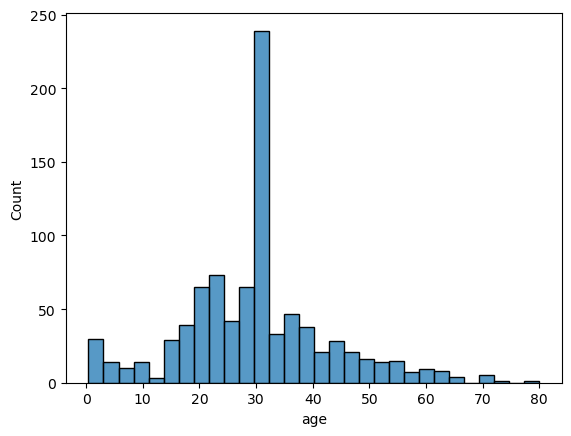

In [19]:
# plotting Histogram of age column
sns.histplot(df['age'])

In [20]:
# binning of age column into7 categories
bins = [0,1,5,12,18,30,50,80]
labels = [
    'Infant', 'Toddler', 'Child (5-12)', 
    'Teen (12-18)', 'Young Adult (18-30)', 
    'Adult (30-50)', 'Senior (50-80)'
]

pd.cut(df['age'], bins=bins, labels=labels)

0      Young Adult (18-30)
1            Adult (30-50)
2      Young Adult (18-30)
3            Adult (30-50)
4            Adult (30-50)
              ...         
886    Young Adult (18-30)
887    Young Adult (18-30)
888    Young Adult (18-30)
889    Young Adult (18-30)
890          Adult (30-50)
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infant' < 'Toddler' < 'Child (5-12)' < 'Teen (12-18)' < 'Young Adult (18-30)' < 'Adult (30-50)' < 'Senior (50-80)']

# **Feature Engineering**
Process of selecting, creating, and transforming raw data into new features that can be used by machine learning models to improve their accuracy and performance

In [21]:
# creating new feature by binning
bins = [0,1,5,12,18,30,50,80]
labels = [
    'Infant', 'Toddler', 'Child', 
    'Teen', 'Young Adult', 
    'Adult', 'Senior'
]

df['binned_age']= pd.cut(df['age'], bins=bins, labels=labels)


In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


In [23]:
df['binned_age'].value_counts()

binned_age
Young Adult    447
Adult          241
Teen            70
Senior          64
Toddler         30
Child           25
Infant          14
Name: count, dtype: int64

In [24]:
# renaming column
df.rename(columns={'binned_age' : 'age_groups'}, inplace=True)

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


## *Survived vs Not Survived by Age Group*

In [ ]:
# Survived vs Not Survived by Age Group
df.groupby(['age_groups', 'survived']).size().unstack()

survived,0,1
age_groups,,
Infant,2,12
Toddler,11,19
Child,16,9
Teen,40,30
Young Adult,299,148
Adult,139,102
Senior,42,22


<Axes: xlabel='age_groups', ylabel='count'>

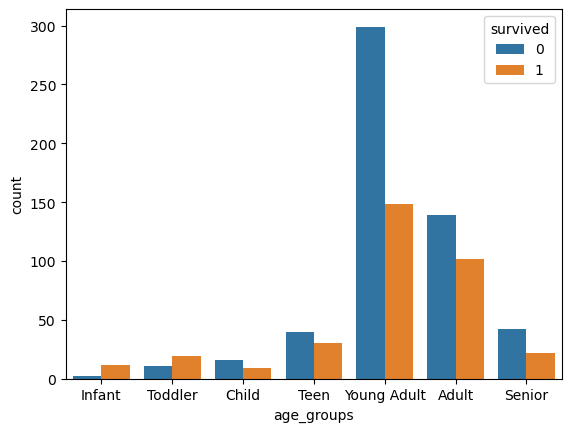

In [47]:
sns.countplot(x='age_groups', hue='survived', data=df)

# **Data Filtration**

In [178]:
# based on columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_groups'],
      dtype='object')

In [187]:
df_01 = df[['survived', 'age_groups', 'sex', 'fare', 'pclass']]

df_01.head()

,survived,age_groups,sex,fare,pclass
0,0,Young Adult,male,7.2500,3
1,1,Adult,female,71.2833,1
2,1,Young Adult,female,7.9250,3
3,1,Adult,female,53.1000,1
4,0,Adult,male,8.0500,3


In [188]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   age_groups  891 non-null    category
 2   sex         891 non-null    object  
 3   fare        891 non-null    float64 
 4   pclass      891 non-null    int64   
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 29.2+ KB


In [208]:
# filtering the data based on rows criteria
df_first = df[df['class'] == 'First']

print(df_first.shape)
df_first.head()

(216, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,Senior
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,Southampton,yes,True,Senior
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True,Young Adult


In [209]:
# selecting only those rows which have paid nore than 100 pounds

df_100 = df[df['fare'] > 100]

print(df_100.shape)
df_100.head()

(53, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,Southampton,no,False,Young Adult
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False,Young Adult
88,1,1,female,23.000000,3,2,263.0000,S,First,woman,False,Southampton,yes,False,Young Adult
118,0,1,male,24.000000,0,1,247.5208,C,First,man,True,Cherbourg,no,False,Young Adult
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,Cherbourg,yes,True,Senior


In [210]:
# let's check the class of df_100

df_100['class'].value_counts()

class
First     53
Second     0
Third      0
Name: count, dtype: int64

In [211]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 27 to 856
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     53 non-null     int64   
 1   pclass       53 non-null     int64   
 2   sex          53 non-null     object  
 3   age          53 non-null     float64 
 4   sibsp        53 non-null     int64   
 5   parch        53 non-null     int64   
 6   fare         53 non-null     float64 
 7   embarked     53 non-null     object  
 8   class        53 non-null     category
 9   who          53 non-null     object  
 10  adult_male   53 non-null     bool    
 11  embark_town  53 non-null     object  
 12  alive        53 non-null     object  
 13  alone        53 non-null     bool    
 14  age_groups   53 non-null     category
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 5.7+ KB


In [212]:
# adding two filter
df[(df['fare'] > 70) & (df['class']=='First')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,Southampton,no,False,Young Adult
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False,Young Adult
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,Cherbourg,no,False,Young Adult
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1,1,female,62.000000,0,0,80.0000,S,First,woman,False,Southampton,yes,True,Senior
835,1,1,female,39.000000,1,1,83.1583,C,First,woman,False,Cherbourg,yes,False,Adult
849,1,1,female,29.699118,1,0,89.1042,C,First,woman,False,Cherbourg,yes,False,Young Adult
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,Southampton,yes,False,Adult


In [215]:
# sorting by fare
df[(df['fare'] > 70) & (df['class']=='First')].sort_values(by='fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
540,1,1,female,36.0,0,2,71.0000,S,First,woman,False,Southampton,yes,False,Adult
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,Southampton,no,False,Senior
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
366,1,1,female,60.0,1,0,75.2500,C,First,woman,False,Cherbourg,yes,False,Senior
218,1,1,female,32.0,0,0,76.2917,C,First,woman,False,Cherbourg,yes,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False,Young Adult
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,Southampton,no,False,Senior
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True,Adult
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True,Adult
